In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv("/content/drive/MyDrive/projects/Laptop Data Cleaning/laptop_price.csv",encoding='unicode_escape')

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


#Data Cleaning

In [7]:
df.drop(columns=['laptop_ID','Product'],inplace=True)

In [8]:
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [9]:
df.duplicated().sum()

29

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1274, 11)

In [12]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
587,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.4kg,1673.0


In [13]:
df['Price_euros']*89.48

,Price_euros
0,119875.4612
1,80437.1512
2,51451.0000
3,227051.0260
4,161386.1280
...,...
1269,64454.2336
1270,57088.2400
1271,134130.5200
1272,20490.9200


In [14]:
df['Price_euros']=round(df['Price_euros']*89.48)

In [15]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119875.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,80437.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51451.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,227051.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,161386.0
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,64454.0
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,57088.0
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,134131.0
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,20491.0


In [16]:
df['Price_euros']=round(df['Price_euros']*89.48).astype('int')

In [17]:
df.rename(columns={'Price_euros':'Price'},inplace=True)

In [18]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
971,Dell,Ultrabook,14.0,Touchscreen 2560x1440,Intel Core i7 6600U 2.6GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.5kg,15716894
817,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23kg,3082586
892,Samsung,Ultrabook,15.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.17kg,13603376


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 119.4+ KB


In [20]:
#converting object column to numeric col
df['Ram'].value_counts()

,count
Ram,
8GB,613
4GB,366
16GB,198
6GB,35
12GB,25
32GB,17
2GB,16
24GB,3
64GB,1


In [21]:
a='4GB'
type(a)

str

In [22]:
a.replace("GB","")

'4'

In [23]:
(lambda a : a.replace("GB",""))('16GB')


'16'

In [24]:
df['Ram']=df['Ram'].apply(lambda a : a.replace("GB","")).astype('int')

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,10726415
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,7197503
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,4603835
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,20316523
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,14440819


<Axes: xlabel='Ram'>

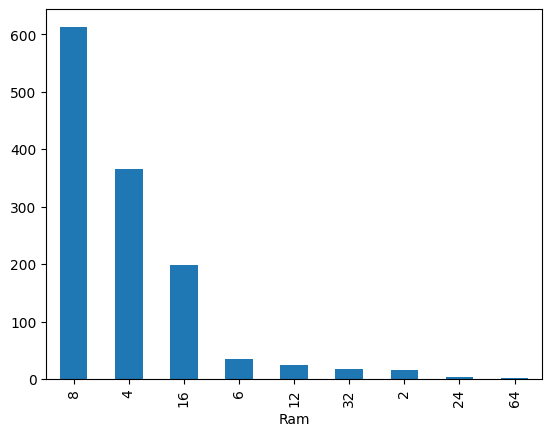

In [26]:
#EDA
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

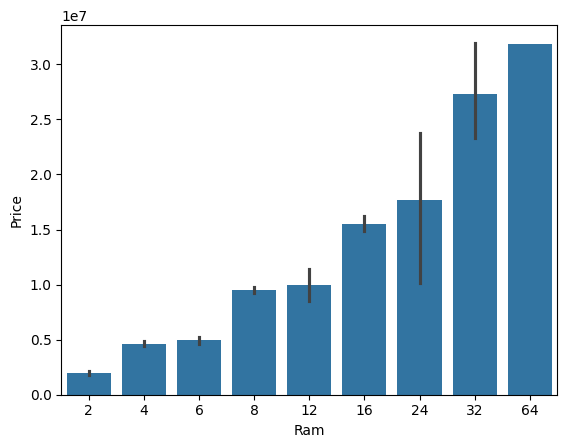

In [27]:
sns.barplot(x=df['Ram'],y=df['Price'])

In [28]:
px.bar(df,x='Ram',y='Price')

In [29]:
df['Weight']

,Weight
0,1.37kg
1,1.34kg
2,1.86kg
3,1.83kg
4,1.37kg
...,...
1269,2.2kg
1270,1.8kg
1271,1.3kg
1272,1.5kg


In [30]:
lambda a : a.replace("kg","")

<function __main__.<lambda>(a)>

In [31]:
df['Weight']=df['Weight'].apply(lambda a : a.replace("kg","")).astype('float')

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,10726415
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7197503
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,4603835
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,20316523
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,14440819


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 119.4+ KB


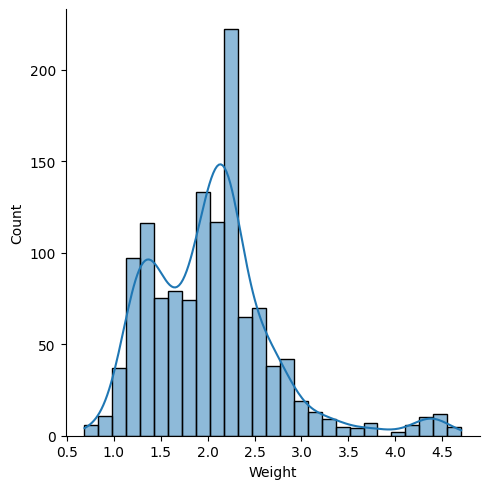

In [34]:
sns.displot(x= df['Weight'],kde=True)

<Axes: xlabel='Weight', ylabel='Price'>

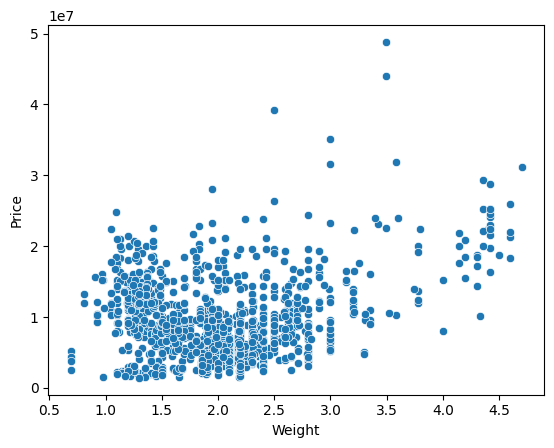

In [35]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int64  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 119.4+ KB


In [37]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [38]:
#Filtering for the companies which has repeated more than 10 times in the dataset
df=df[df.groupby('Company')['Company'].transform('count')>10]

In [39]:
df['Company'].value_counts()

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,151
Acer,101
MSI,54
Toshiba,48
Apple,21


In [40]:
#After droping the companies
df.shape

(1223, 11)

<Axes: xlabel='Company', ylabel='Price'>

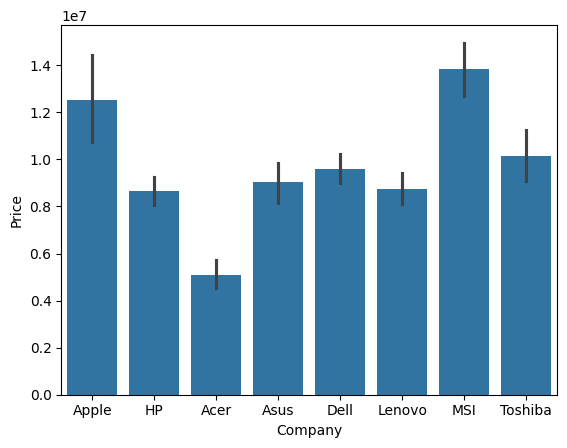

In [41]:
sns.barplot(x=df['Company'],y=df['Price'])

In [42]:
px.bar(df,x='Company',y='Price')

In [43]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1235,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.1,3827149


In [44]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,687
Gaming,200
Ultrabook,171
2 in 1 Convertible,114
Workstation,29
Netbook,22


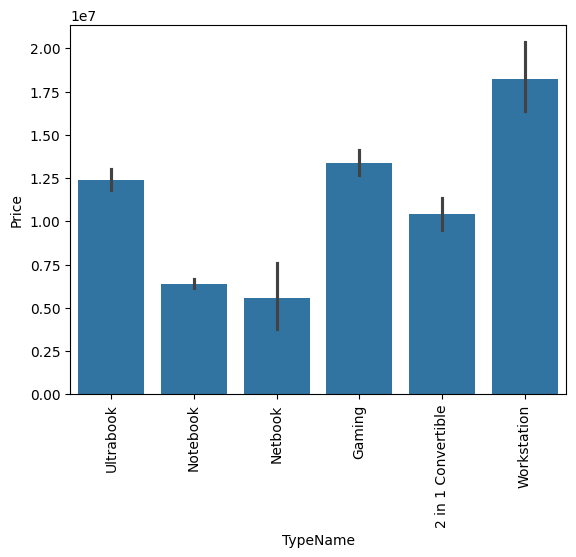

In [45]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [46]:
df['Inches'].value_counts()

,count
Inches,
15.6,636
14.0,182
17.3,162
13.3,152
12.5,37
11.6,29
12.0,6
13.9,6
15.4,4


In [47]:
df = df[df.groupby("Inches")["Inches"].transform('count') > 10]

<Axes: xlabel='Inches'>

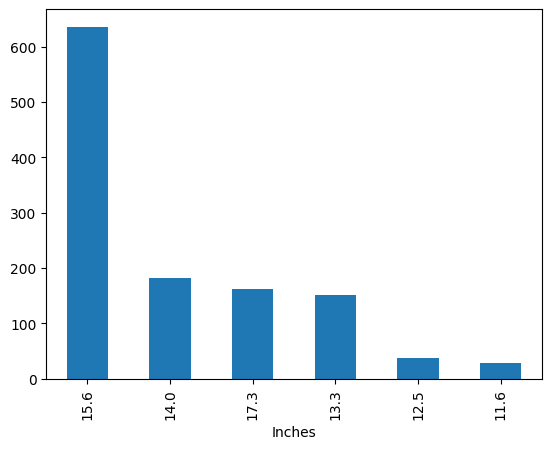

In [48]:
df['Inches'].value_counts().plot(kind='bar')

<ipython-input-49-3edf8f871590>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Inches', ylabel='Price'>

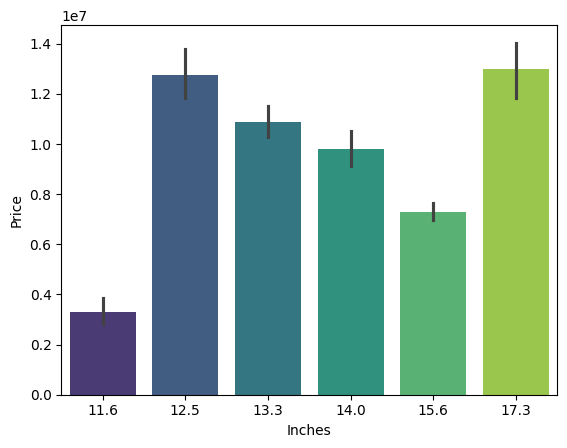

In [49]:
#Inches vs Price
sns.barplot(x=df['Inches'],y=df['Price'],palette='viridis')

<ipython-input-50-136b9b3b860a>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Axes: xlabel='Inches', ylabel='Price'>

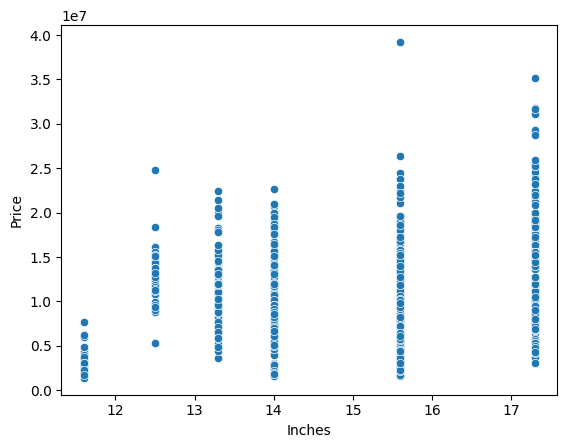

In [50]:
sns.scatterplot(x=df['Inches'],y=df['Price'],palette='viridis')

In [51]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,19280077


In [52]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [53]:
a='Touchscreen / Full HD 1920x1080'

In [54]:
a.split()[-1]

'1920x1080'

In [55]:
a.split()[-1].split('x')

['1920', '1080']

In [56]:
a.split()[-1].split('x')[0] #X_res

'1920'

In [57]:
a.split()[-1].split('x')[1] #Y_res

'1080'

In [58]:
df['X_res']=df['ScreenResolution'].apply((lambda x: a.split()[-1].split('x')[0])).astype('int')

In [59]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,10726415,1920
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7197503,1920
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,4603835,1920
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,14440819,1920
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,3202668,1920


In [60]:
df['Y_res']=df['ScreenResolution'].apply((lambda x: a.split()[-1].split('x')[1])).astype('int')

In [61]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
948,Dell,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,5276367,1920,1080


In [62]:
def pow(a,b):
  return a**b

In [63]:
#Add a column for ppi
df['PPI']=round(((df['X_res']**2) + (df['Y_res']**2))**0.5 / df['Inches'])

In [64]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,10726415,1920,1080,166.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7197503,1920,1080,166.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,4603835,1920,1080,141.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,14440819,1920,1080,166.0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,3202668,1920,1080,141.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, 0 to 1273
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1198 non-null   object 
 1   TypeName          1198 non-null   object 
 2   Inches            1198 non-null   float64
 3   ScreenResolution  1198 non-null   object 
 4   Cpu               1198 non-null   object 
 5   Ram               1198 non-null   int64  
 6   Memory            1198 non-null   object 
 7   Gpu               1198 non-null   object 
 8   OpSys             1198 non-null   object 
 9   Weight            1198 non-null   float64
 10  Price             1198 non-null   int64  
 11  X_res             1198 non-null   int64  
 12  Y_res             1198 non-null   int64  
 13  PPI               1198 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 140.4+ KB


<Axes: xlabel='PPI', ylabel='Price'>

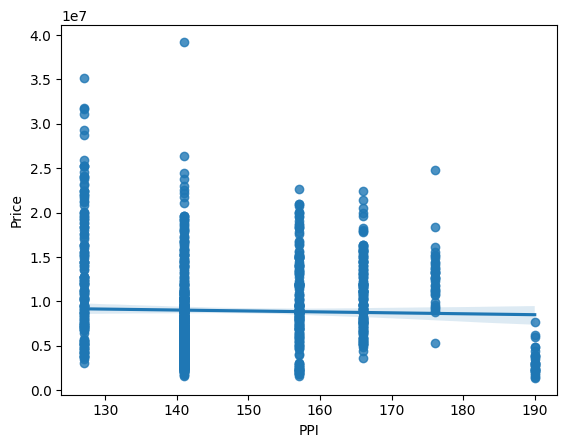

In [66]:
#PPI vs Price Analysis
sns.regplot(x=df['PPI'],y=df['Price'])

#Interview Questions
The line is dividing our cluster in two halves

In [67]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,491
1366x768,256
IPS Panel Full HD 1920x1080,217
Full HD / Touchscreen 1920x1080,44
IPS Panel Full HD / Touchscreen 1920x1080,43
1600x900,22
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [68]:
#If there is IPS in this str return 1 else 0
df['IPS'] = df['ScreenResolution'].apply(lambda a : 1 if "IPS" in a else 0)

In [69]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,PPI,IPS
1027,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.95,8487089,1920,1080,157.0,0
370,Asus,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD + 2TB HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,8799374,1920,1080,141.0,0
1129,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,9039538,1920,1080,127.0,1


In [70]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda a : 1 if "Touchscreen" in a else 0)

In [71]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res,PPI,IPS,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,10726415,1920,1080,166.0,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,7197503,1920,1080,166.0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,4603835,1920,1080,141.0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,14440819,1920,1080,166.0,1,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,3202668,1920,1080,141.0,0,0


In [72]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1041
1,157


In [73]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [74]:
df.shape

(1198, 12)

In [75]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,122
Intel Core i5 8250U 1.6GHz,70
Intel Core i7 8550U 1.8GHz,68
...,...
AMD E-Series E2-9000 2.2GHz,1
Intel Core i5 2.0GHz,1
Intel Core M M3-6Y30 0.9GHz,1


In [76]:
a='Intel Core i5 7200U 2.5GHz'

In [77]:
a.split()#to convert str into list

['Intel', 'Core', 'i5', '7200U', '2.5GHz']

In [78]:
a.split()[0:3]

['Intel', 'Core', 'i5']

In [79]:
" ".join(a.split()[0:3])

'Intel Core i5'

In [80]:
(lambda a:" ".join(a.split()[0:3]))("AMD E-Series E2-9000 2.2GHz")

'AMD E-Series E2-9000'

In [81]:
df['Cpu']=df['Cpu'].apply(lambda a:" ".join(a.split()[0:3]))

In [82]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i7,483
Intel Core i5,409
Intel Core i3,133
Intel Celeron Dual,64
Intel Pentium Quad,27
AMD A9-Series 9420,11
Intel Core M,10
AMD A6-Series 9220,8
AMD A12-Series 9720P,7


In [83]:
#Will filter the AMD cpu wrt the Series
#AMD AMD A4-Series 7210 >> AMD A-Series
#AMD E-Series 9000   >> AMD E-Series
#AMD FX 8800P        >> AMD F-Series

In [84]:
def fetch_pro(text):
  if text == 'Intel Core i7' or text=='Intel Core i3' or text =='Intel Core i5':
    return text
  elif text.split()[0]=='Intel':
    return "Other Intel Processor"
  else:
    if text[4]=='E':
      return "AMD E-Series"
    elif text[4]=='A':
      return "AMD A-Series"
    elif text[4]=='F':
      return "AMD F-Series"
    else:
      return "AMD Ryzen Series"

In [85]:
a='Intel Atom x5-Z8350'
a.split()[0]

'Intel'

In [86]:
b='AMD FX 8800P'
b[4]

'F'

In [87]:
fetch_pro('Intel Core i5')

'Intel Core i5'

In [88]:
df['Cpu']=df['Cpu'].apply(fetch_pro)

<Axes: xlabel='Cpu'>

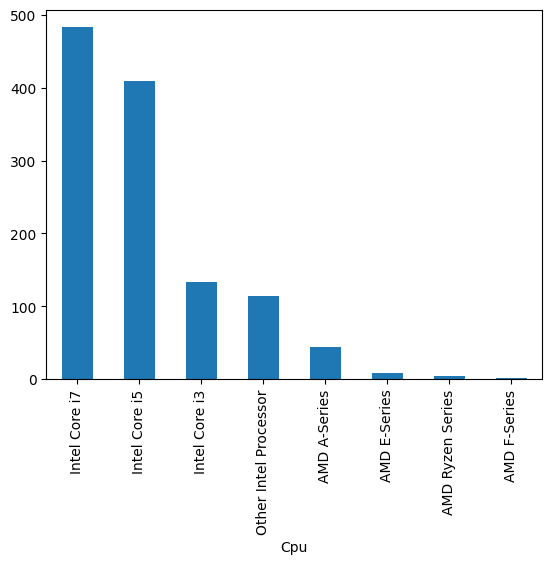

In [89]:
df['Cpu'].value_counts().plot(kind='bar')

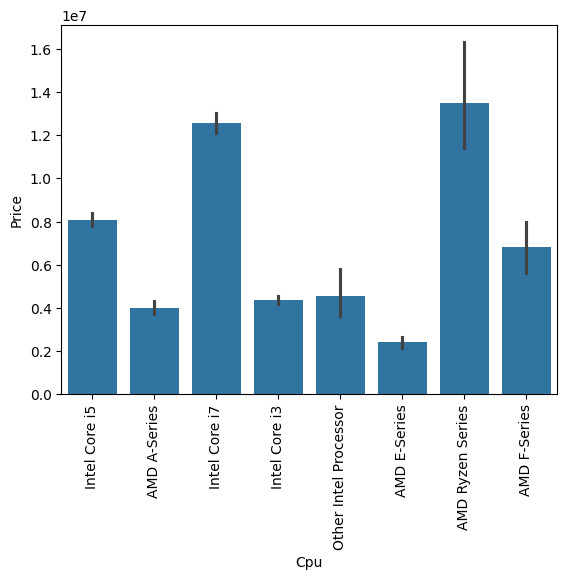

In [90]:
sns.barplot(x=df['Cpu'],y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [91]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,Touchscreen
291,Asus,Gaming,Intel Core i7,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,9503939,127.0,0,0
979,Asus,Gaming,Intel Core i7,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99,14003709,127.0,0,0
63,Asus,Notebook,Intel Core i5,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.40,7534305,157.0,0,0


In [92]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,262
Intel HD Graphics 520,179
Nvidia GeForce GTX 1050,65
Intel UHD Graphics 620,64
Nvidia GeForce GTX 1060,45
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [93]:
a='Intel HD Graphics 540'
a.split()[0:2]

['Intel', 'HD']

In [94]:
" ".join(a.split()[0:2])

'Intel HD'

In [95]:
(lambda a:" ".join(a.split()[0:2]))('AMD adeon R7')

'AMD adeon'

In [96]:
df['Gpu']=df['Gpu'].apply(lambda a:" ".join(a.split()[0:2]))

In [97]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD,570
Nvidia GeForce,353
AMD Radeon,162
Intel UHD,64
Nvidia Quadro,31
Intel Iris,10
AMD FirePro,5
AMD R4,1
AMD R17M-M1-70,1


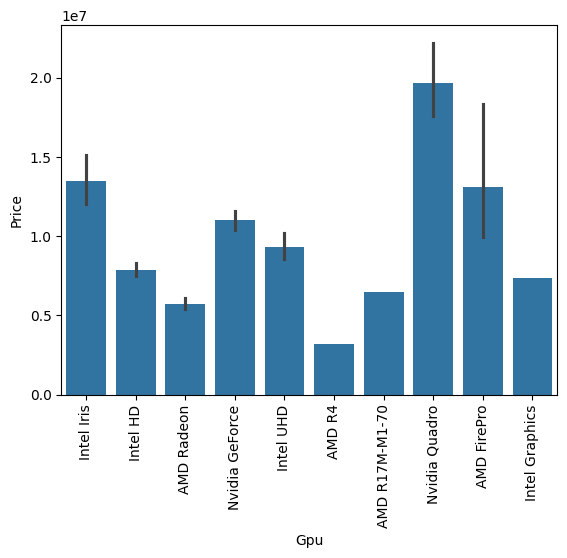

In [98]:
sns.barplot(x=df['Gpu'],y=df['Price'])
plt.xticks(rotation =90)
plt.show()

In [99]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,Touchscreen
227,Asus,Notebook,Intel Core i5,8,256GB SSD,Nvidia GeForce,Windows 10,2.0,6157119,141.0,0,0


In [100]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,997
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
macOS,8
Mac OS X,3
Windows 10 S,2


In [101]:
#Wherever we have Windows 10 or Window 10 S >>> Windows 10
#Windows 7 >> Windows 7
#if we have Mac OS X	or macOS >>  mac OS
#No OS >> No OS
#Linux >> Linux
#Chrome OS >>> Chrome OS

In [102]:
def os(text):
  if text=='Windows 10' or text=='Windows 10 S':
    return 'Windows 10'
  elif text =='macOS'or text=='Mac OS X':
    return 'Mac OS'
  elif text == 'Windows 7':
    return 'Windows 7'
  elif text == 'No OS':
    return 'No OS'
  elif text == 'Linux':
    return "Linux"
  else:
    return "Chrome OS"

In [103]:
df['OpSys']=df['OpSys'].apply(os)

In [104]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,999
No OS,63
Linux,58
Windows 7,45
Chrome OS,22
Mac OS,11


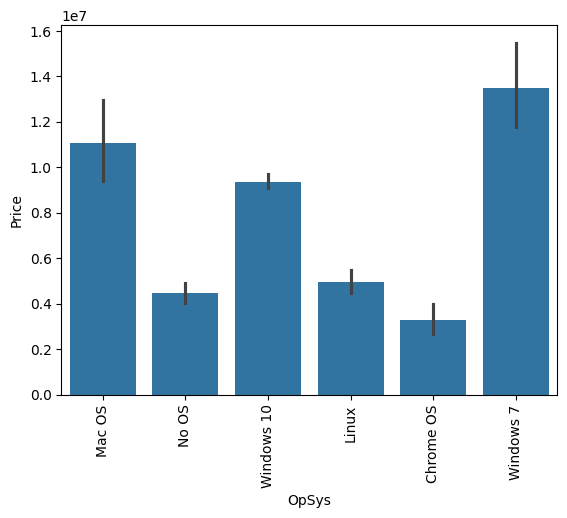

In [105]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation =90)
plt.show()

In [106]:
df[df['OpSys']=='Windows 7']['Price'].max()

35141301

In [107]:
df[df['OpSys']=='Windows 7']['Price'].describe()

,Price
count,4.500000e+01
mean,1.350447e+07
std,6.229586e+06
min,5.900938e+06
25%,9.343502e+06
50%,1.197001e+07
75%,1.641672e+07
max,3.514130e+07


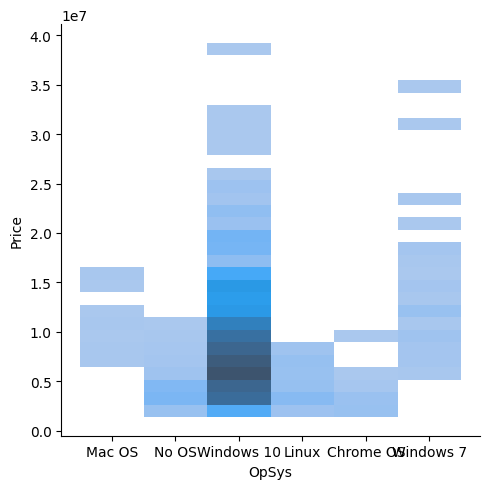

In [108]:
sns.displot(data =df,x='OpSys',y='Price')

In [109]:
df.sample()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,Touchscreen
1197,Asus,Gaming,Intel Core i7,16,512GB SSD + 1TB HDD,Nvidia GeForce,Windows 10,4.3,17214341,127.0,1,0


In [110]:
#Falsh Storage
#SDD
#HDD
#Hybrid
df['Memory'].value_counts()

,count
Memory,
256GB SSD,387
1TB HDD,213
500GB HDD,122
512GB SSD,99
128GB SSD + 1TB HDD,93
256GB SSD + 1TB HDD,73
128GB SSD,71
32GB Flash Storage,28
2TB HDD,16


In [111]:
new=df['Memory'].str.split('+',n=1,expand=True)
new

,0,1
0,128GB SSD,None
1,128GB Flash Storage,None
2,256GB SSD,None
4,256GB SSD,None
5,500GB HDD,None
...,...,...
1269,500GB HDD,None
1270,128GB SSD,None
1271,512GB SSD,None
1272,64GB Flash Storage,None


In [112]:
df['First']=new[0]
df['First']

,First
0,128GB SSD
1,128GB Flash Storage
2,256GB SSD
4,256GB SSD
5,500GB HDD
...,...
1269,500GB HDD
1270,128GB SSD
1271,512GB SSD
1272,64GB Flash Storage


In [113]:
df['First']=df['First'].str.strip()# strip is used to remove white space

In [114]:
df['Second']=new[1]
df['Second'].sample(5)

,Second
760,1TB HDD
1225,None
823,None
1001,None
889,None


In [115]:
df['Layer1HDD']=df['First'].apply(lambda a:1 if 'HDD' in a else 0)

In [116]:
df['Layer1SSD']=df['First'].apply(lambda a:1 if 'SDD' in a else 0)

In [117]:
df['Layer1Hybrid']=df['First'].apply(lambda a:1 if 'Hybrid' in a else 0)

In [118]:
df['Layer1Flash_Storage']=df['First'].apply(lambda a:1 if 'Flash Storage' in a else 0)

In [119]:
df['First']=df['First'].str.replace(r'\D','',regex=True) #regular expression are used to validate,or manipulate string and pattern in text

In [120]:
df['Second'].fillna("0",inplace=True)

<ipython-input-120-ff9512e1ea67>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [121]:
df['Second']=df['Second'].str.strip()

In [122]:
df['Layer2HDD']=df['Second'].apply(lambda a:1 if 'HDD' in a else 0)

In [123]:
df['Layer2SSD']=df['Second'].apply(lambda a:1 if 'SDD' in a else 0)
df['Layer2Hybrid']=df['Second'].apply(lambda a:1 if 'Hybrid' in a else 0)
df['Layer2Flash_Storage']=df['Second'].apply(lambda a:1 if 'Flash Storage' in a else 0)

In [124]:
df['Second']=df['Second'].str.replace(r'\D',"",regex=True)

In [125]:
df['First']=df['First'].astype('int')
df['Second']=df['Second'].astype('int')

In [126]:
df['HDD']=df['First']*df['Layer1HDD']+df['Second']*df['Layer2HDD']

df['SSD']=df['First']*df['Layer1SSD']+df['Second']*df['Layer2SSD']

df['Hybrid']=df['First']*df['Layer1Hybrid']+df['Second']*df['Layer2Hybrid']

df['Flash_Storage']=df['First']*df['Layer1Flash_Storage']+df['Second']*df['Layer2Flash_Storage']

In [127]:
df.drop(columns=['First','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

In [128]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PPI,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris,Mac OS,1.37,10726415,166.0,1,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD,Mac OS,1.34,7197503,166.0,0,0,0,0,0,128
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD,No OS,1.86,4603835,141.0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris,Mac OS,1.37,14440819,166.0,1,0,0,0,0,0
5,Acer,Notebook,AMD A-Series,4,500GB HDD,AMD Radeon,Windows 10,2.10,3202668,141.0,0,0,500,0,0,0


In [129]:
df.to_csv("LaptopCD.csv")

Machine Learning

In [130]:
df.shape

(1198, 16)

In [131]:
df.drop(columns='Memory',inplace=True)

In [132]:
df.shape

(1198, 15)

In [133]:
#Input and output columns
X=df.drop(columns=['Price'])#input col

In [134]:
#o/p
y=df['Price']

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #data spliting 80%::20% validating data

In [136]:
X_train

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,PPI,IPS,Touchscreen,HDD,SSD,Hybrid,Flash_Storage
352,MSI,Gaming,Intel Core i7,8,Nvidia GeForce,Windows 10,2.70,127.0,0,0,1,0,0,0
433,Lenovo,Workstation,Intel Core i7,16,Nvidia GeForce,Windows 10,2.30,141.0,1,0,0,0,0,0
85,Dell,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,2.65,141.0,1,0,1,0,0,0
928,Dell,Notebook,Intel Core i5,4,Intel HD,Windows 10,2.18,141.0,0,0,1,0,0,0
148,MSI,Gaming,Intel Core i7,16,Nvidia GeForce,Windows 10,2.90,127.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,Dell,Notebook,Intel Core i5,4,AMD Radeon,Windows 7,2.24,141.0,0,0,500,0,0,0
1166,Lenovo,Notebook,Intel Core i5,8,Intel HD,Windows 10,1.95,141.0,1,0,0,0,0,0
1203,Dell,Ultrabook,Intel Core i7,16,Intel HD,Windows 10,1.20,166.0,0,1,0,0,0,0
922,HP,Ultrabook,Intel Core i7,8,Intel HD,Windows 10,1.39,166.0,0,1,0,0,0,0


In [137]:
from sklearn.compose import ColumnTransformer  #it help OHE to convert categorical col into machine language
from sklearn.pipeline import Pipeline    #used for connection
from sklearn.preprocessing import OneHotEncoder #human language to machine understandable language
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [138]:
from sklearn.linear_model import LinearRegression #loading the algorithm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor

In [139]:
#Linearn Regression

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([('step1',step1),('step2',step2)])  #connecting steps

pipe.fit(X_train,y_train)   #Training ml model

y_pred=pipe.predict(X_test) #model Prediction

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

R2_Score 0.7432022099668123
MAE 2068325.3817438125
MSE 7762527186130.706


In [140]:
y_pred=pipe.predict(X_test) #model Prediction

In [141]:
y_test #actual prediction

,Price
1252,4555785
1080,11201375
111,11041206
467,6077034
65,15877242
...,...
403,7037870
927,9327753
578,21850211
1267,6453298


In [142]:
#KNeighborsRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2=KNeighborsRegressor()

pipe=Pipeline([('step1',step1),('step2',step2)])  #connecting steps

pipe.fit(X_train,y_train)   #Training ml model

y_pred=pipe.predict(X_test) #model Prediction

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

R2_Score 0.7785980046972131
MAE 1749726.825
MSE 6692577094917.189


Evaluation Metrics Reg/Class interview question

In [143]:
#DecisionTreeRegressor

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=10)

pipe=Pipeline([('step1',step1),('step2',step2)])  #connecting steps

pipe.fit(X_train,y_train)   #Training ml model

y_pred=pipe.predict(X_test) #model Prediction

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

R2_Score 0.6811122374523073
MAE 1933435.0197270697
MSE 9639393414487.512


In [144]:
#RandomForestRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=150,max_depth=10)

pipe=Pipeline([('step1',step1),('step2',step2)])  #connecting steps

pipe.fit(X_train,y_train)   #Training ml model

y_pred=pipe.predict(X_test) #model Prediction

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

R2_Score 0.7756294916913107
MAE 1702272.5352446584
MSE 6782309809936.745


In [145]:
#AdaBoostRegressor
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
],remainder='passthrough')

step2=AdaBoostRegressor()

pipe=Pipeline([('step1',step1),('step2',step2)])  #connecting steps

pipe.fit(X_train,y_train)   #Training ml model

y_pred=pipe.predict(X_test) #model Prediction

print("R2_Score",r2_score(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

R2_Score 0.6827151205351751
MAE 2384742.1095561543
MSE 9590941192584.271


In [1]:
#XGBRegressor
# step1=ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,5])
# ],remainder='passthrough')

# step2=XGBRegressor()

# pipe=Pipeline([('step1',step1),('step2',step2)])  #connecting steps

# pipe.fit(X_train,y_train)   #Training ml model

# y_pred=pipe.predict(X_test) #model Prediction

# print("R2_Score",r2_score(y_test,y_pred))
# print("MAE",mean_absolute_error(y_test,y_pred))
# print("MSE",mean_squared_error(y_test,y_pred))

In [145]:
#File Handling
# 4 mode>>>w-mode,r-mode,wb-mode,rb-mode



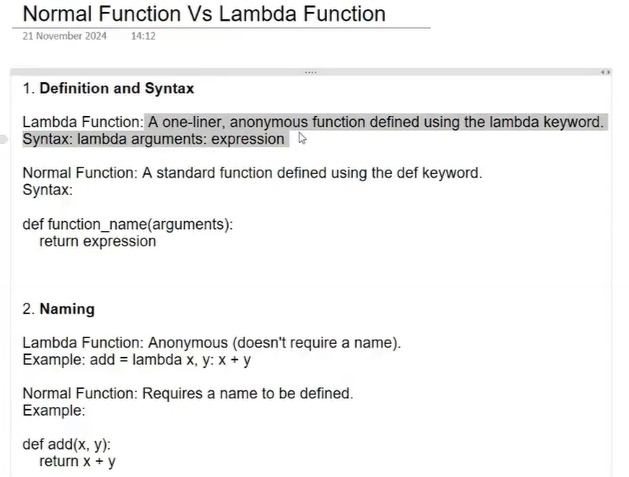

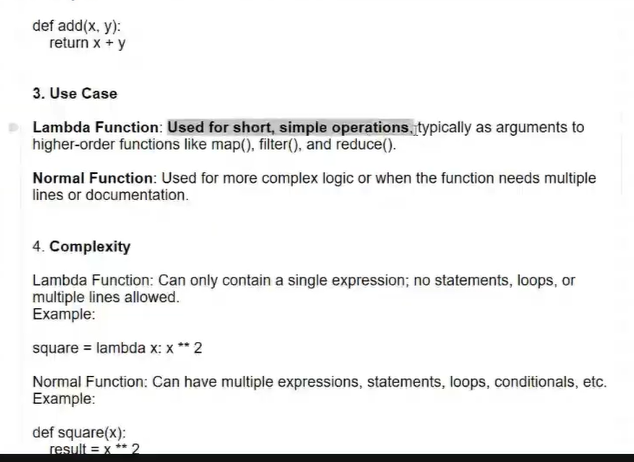

#**Lambda function**
#Definition and syntax
LF=I one-liner, anonymous function defined using the lambda keyword<br>
Syntax:lambda argument:expression
       lambda a : a.replace("gb","")<br>
Normal Function=Astandard function define using the def keyword.<br>
Syntax: def function_name(arguments):
          #logic
          #logic
            return expression

